### Первое домашнее задание (практическое). NumPy, Pandas


### Формат сдачи
Задания сдаются через сайт emkn. Посылка должна содержать:
* Сделанный ноутбук `HW1_numpy_pandas_pr_Username.ipynb`. `Username` — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

### (8 баллов) Знакомство с Numpy

Во всех заданиях данного раздела запрещено использовать циклы (ключевые слова *for* и *while*), [list comprehension](https://habrahabr.ru/post/30232/), [map и т.п.](http://pythonicway.com/python-functinal-programming)

Под матрицей в заданиях понимается двумерный [numpy.array](https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html)

In [2]:
import numpy as np

from numpy.testing import assert_array_equal

import typing as tp
import dataclasses

**1. (0.5 балла)** Реализуйте функцию, принимающую на вход матрицу ```X``` и два массива индексов ```row_indices``` и ```col_indices``` одинаковой длины и возвращающую np.array, состоящий из последовательности элементов 

```[X[row_indices[0], col_indices[0]], ... , X[row_indices[N-1], col_indices[N-1]]]```

In [6]:
def construct_array(
        X: tp.Any,
        row_indices: tp.List[int],
        col_indices: tp.List[int]) -> tp.Any:
    """
    Construct slice of given matrix by indices row_indices and col_indices:
    [X[row_indices[0], col_indices[0]], ... , X[row_indices[N-1], col_indices[N-1]]]
    :param X: input matrix
    :param row_indices: list of row indices
    :param col_indices: list of column indices
    :return: matrix slice
    """
    # pass # Your code here
    return X[np.array(row_indices, dtype=np.int64), np.array(col_indices, dtype=np.int64)]


In [7]:
@dataclasses.dataclass
class ConstructArrayCase:
    matrix: tp.Any
    row_indices: tp.Any
    col_indices: tp.Any
    result: np.array


CONSTRUCT_ARRAY_TEST_CASES = [
    ConstructArrayCase(matrix=np.array(range(25)).reshape(5, 5),
                       row_indices=[0, 1, 2],
                       col_indices=[0, 1, 2],
                       result=np.array([0, 6, 12])),
    ConstructArrayCase(matrix=np.arange(-10, 10).reshape((5, 4)),
                       row_indices=[1, 2, 3, 3],
                       col_indices=[3, 2, 1, 2],
                       result=np.array([-3, 0, 3, 4])),
    ConstructArrayCase(matrix=np.arange(42).reshape((7, 6)),
                       row_indices=[],
                       col_indices=[],
                       result=np.array([])),
    ConstructArrayCase(matrix=np.arange(42).reshape((7, 6)),
                       row_indices=np.arange(4),
                       col_indices=np.arange(4),
                       result=np.array(np.arange(4)) * 7),
    ConstructArrayCase(matrix=np.arange(42).reshape((42, 1)),
                       row_indices=[0, 1, 41],
                       col_indices=[0, 0, 0],
                       result=np.array([0, 1, 41]))
]

In [8]:
for t in CONSTRUCT_ARRAY_TEST_CASES:
    assert_array_equal(construct_array(t.matrix, t.row_indices, t.col_indices), t.result)
print("Seems all right!")

Seems all right!


**2. (1 балл)** Реализуйте функцию, принимающую на вход два одномерных массива ```x``` и ```y``` и возвращающую матрицу, в которой первый массив соответствует первому столбцу матрицы, второй — второму.

В этом задании **запрещается** пользоваться операцией транспонирования и рекомедуется воспользоваться методом [reshape](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.reshape.html).

In [18]:
def construct_matrix(first_array: tp.Any, second_array: tp.Any) -> tp.Any:
    """
    Construct matrix from pair of arrays
    :param first_array: first array
    :param second_array: second array
    :return: constructed matrix
    """
    # pass # Your code here
    return np.concatenate((first_array.reshape(-1, 1), second_array.reshape(-1, 1)), axis=1)

In [19]:
@dataclasses.dataclass
class ConstructMatrixCase:
    first_array: tp.Any
    second_array: tp.Any
    result: tp.Any


CONSTRUCT_MATRIX_TEST_CASES = [
    ConstructMatrixCase(
        first_array=np.array([1, 2, 3]),
        second_array=np.array([4, 5, 6]),
        result=np.array([[1, 4], [2, 5], [3, 6]])),
    ConstructMatrixCase(
        first_array=np.array([]),
        second_array=np.array([]),
        result=np.array([]).reshape(0, 2)),
    ConstructMatrixCase(
        first_array=np.array([1]),
        second_array=np.array([2]),
        result=np.array([[1, 2]])),
    ConstructMatrixCase(
        first_array=np.arange(0, 100, 2),
        second_array=np.arange(1, 100, 2),
        result=np.arange(100).reshape(50, 2))
]


In [20]:
for t in CONSTRUCT_MATRIX_TEST_CASES:
    assert_array_equal(construct_matrix(t.first_array, t.second_array), t.result)
print("Seems all right!")

Seems all right!


**3. (0.5 балла)** Реализуйте функцию для подсчёта произведения ненулевых элементов на диагонали прямоугольной матрицы

Например, для ```X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])``` ответом является 3.
Если ненулевых элементов нет, функция должна возвращать ```None```.

In [34]:
def nonzero_product(X: tp.Any) -> tp.Optional[float]:
    """
    Compute product of nonzero diagonal elements of matrix
    If all diagonal elements are zeros, then return None
    :param X: array,
    :return: product value or None
    """
    # pass # Your code here
    diag = np.diagonal(X)
    diag_not0 = np.nonzero(diag)[0]
    if diag_not0.size == 0:
        return None
    return np.prod(diag[diag_not0])
    

# X = np.array([[1, 0, 1], 
#               [2, 0, 2], 
#               [3, 0, 3], 
#               [4, 4, 4]])

# print(nonzero_product(X))

# X = np.array([[0, 0, 1], 
#               [2, 0, 2], 
#               [3, 0, 0], 
#               [4, 4, 4]])

# print(nonzero_product(X))


3
None


**4. (1 балл)** Реализуйте функцию, возвращающую максимальный элемент в массиве ```X``` среди элементов, перед которыми стоит нулевой.

Например, для ```X = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])``` ответом является 5.
Если подходящих элементов нет, функция должна возвращать ```None```.

In [38]:
def max_element_spec(array: tp.Any) -> tp.Optional[float]:
    """
    Return max element in front of which is zero for input array.
    If appropriate elements are absent, then return None
    :param x: array,
    :return: max element value or None
    """
    # pass # Your code here
    ind_0 = np.where(array[:-1] == 0)[0] + 1
    if ind_0.size == 0:
        return None
    return np.max(array[ind_0])

# X = np.array([1, 2, 3, 4, 5, 0])
# print(max_element_spec(X))

# X = np.array([0, 1, 0, 2, 0, 1, 3, 0])
# print(max_element_spec(X))

None
2


**5. (0.5 балла)** Реализуйте функцию, принимающую на вход матрицу ```X``` и некоторое число ```value``` и возвращающую ближайший к числу элемент матрицы.

Например, для ```X = np.arange(0,10).reshape((2, 5))``` и ```value = 3.6``` ответом будет 4.

In [46]:
def nearest_value(X: tp.Any, value: float) -> tp.Optional[float]:
    """
    Find nearest value in matrix X.
    If matrix X is empty return None
    :param X: input matrix
    :param value: value to find
    :return: nearest value in matrix or None
    """
    # pass # Your code here
    if X.size == 0:
        return None
    res = np.abs(X - value)
    return X[np.unravel_index(np.argmin(res), X.shape)]


# X = np.arange(0, 10).reshape((2, 5))
# print(nearest_value(X, 3.6))

4


**6. (0.5 балла)** Реализуйте функцию, принимающую на вход матрицу *X* и возвращающую все встречающиеся в ней строки, но только в единственном экземпляре.

In [47]:
def get_unique_rows(X: tp.Any) -> tp.Any:
    """
    Makes unique rows of matrix
    :param X: matrix
    :return: the sorted unique rows of a matrix
    """
    # pass # Your code here
    return np.unique(X, axis=0)

# X = np.array([[1, 2, 3],
#               [4, 5, 6],
#               [1, 2, 3],
#               [4, 5, 6]])

# print(get_unique_rows(X))

[[1 2 3]
 [4 5 6]]


**7. (1 балл)** Реализуйте функцию, которая во входной вещественной матрице ```X``` находит все значения ```nan``` и заменяет их на среднее арифметическое всех остальных элементов. Если все элементы матрицы ```nan```, то верните нулевую матрицу той же размерности.

Например, матрица ```np.array([[nan,  1,  2,  3], [4, nan,  5, nan]])``` перейдет в ```np.array([[3, 1, 2, 3], [4, 3, 5, 3]])```

In [61]:
def replace_nans(matrix: tp.Any) -> tp.Any:
    """
    Replace all nans in matrix with average of other values.
    If all values are nans, then return zero matrix of the same size.
    :param matrix: matrix,
    :return: replaced matrix
    """
    # pass # Your code here
    find_not_nan = ~np.isnan(X)
    if not np.any(find_not_nan):
        return np.zeros_like(matrix)
    
    mean_withoutnan = np.nanmean(matrix)
    matrix[np.isnan(matrix)] = mean_withoutnan
    return matrix

# X = np.array([[1,  2,  3, np.nan,],
#               [4,  5, np.nan, 6]])

# print(replace_nans(X))

# X = np.array([[np.nan, np.nan],
#                [np.nan, np.nan],])
# print(replace_nans(X))

[[1.  2.  3.  3.5]
 [4.  5.  3.5 6. ]]
[[0. 0.]
 [0. 0.]]


**8. (1 балл)** Написать функцию, которая получает на вход матрицу и масштабирует каждый её столбец, а именно вычитает из столбца его среднее значение и делит столбец на стандартное отклонение. Для тестирования можно сгенерировать с помощью метода *numpy.random.randint* случайную матрицу и проверить на ней работу метода. Убедитесь, что в функции не будет происходить деления на ноль. 

In [69]:
def scale(X):
    """
    Scales each column of matrix X, 
    namely, subtracts its mean from the column and 
    divides the column by the standard deviation.
    """
    # pass # Your code here
    std = np.std(X, axis=0)
    std[std == 0] = 1    
    return (X - np.mean(X, axis=0)) / std
    
# matrix = np.random.randint(0, 10, size=(2, 5))
# print(matrix)
# print(scale(matrix))


[[2 8 6 6 2]
 [5 8 7 3 8]]
[[-1.  0. -1.  1. -1.]
 [ 1.  0.  1. -1.  1.]]


**9. (1 балл)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения *N*(10,1)

In [81]:
def get_matrix_parameters(X):
    """ Определитель
    след
    наим и наиб элемент
    норма Фробениуса
    собственные числа
    обратная матрица """
    
    det_ = None
    if X.shape[0] == X.shape[1]:
        det_ = np.linalg.det(X)
    
    tr_ = np.trace(X)
    
    min_, max_ = np.min(X) , np.max(X)
    
    fro_ = np.linalg.norm(X, 'fro')
    
    eival_ = np.linalg.eigvals(X)  
    
    inv_ = None
    if det_ != None and det_ != 0: 
        inv_ = np.linalg.inv(X)
        
    return {
        "det": det_,
        "trace": tr_,
        "min": min_,
        "max": max_,
        "frobenius_norm": fro_,
        "eigenvalues": eival_,
        "inv_matrix": inv_,
    }


X = np.random.normal(10, 1, (4, 4))
for key, value in get_matrix_parameters(X).items():
    print(key, ":", value)

det : 13.366374394289446
trace : 41.05566340170754
min : 8.854291101750412
max : 11.510860618977427
frobenius_norm : 40.298822176820565
eigenvalues : [40.10614735+0.j          1.47171904+0.j         -0.26110149+0.39784274j
 -0.26110149-0.39784274j]
inv_matrix : [[ 0.44713559 -0.44037255 -0.28671441  0.33700186]
 [-0.40846621 -0.12228112 -0.40996592  0.91188809]
 [ 2.59403315 -0.03332531 -1.50506212 -0.85354884]
 [-2.74015731  0.67921297  2.3437246  -0.4213931 ]]


**10. (1 балл)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль? (в данной задаче можно использовать цикл только для повторения эксперимента) 
Какое распределение у элементов произведения?

In [ ]:
cnt = 100
max_ = []
all_elements = []

for _ in range(cnt):
    matrix = np.dot(np.random.normal(0, 1, (10, 10)), np.random.normal(0, 1, (10, 10)))
    max_.append(np.max(matrix))
    all_elements.extend(matrix.flatten())

print(np.mean(max_), " - среднее значение у макс элементов")
print(np.quantile(max_, 0.95), " - 95 квантиль")

### (4 балла) Pandas 


Загрузите данные о пассажирах Титаника из файла *titanic.csv* и ответьте на вопросы ниже. Каждый ответ поясните.

**1. (1 балл)** Опишите данный датасет: какое расределение женщин/мужчин в нем? Сколько пассажиров ехало в каждом классе? Какой средний/минимальный/максимальный возраст пассажиров? Сколько было выживших пассажиров?

In [82]:
import pandas as pd


In [85]:
data = pd.read_csv('titanic.csv', sep='\t')

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [89]:
# рапределение м и ж 
print(f"распределение м и ж: \n {data['Sex'].value_counts()}\n")

# колво пассажиров в классах
print(f"колво пассажиров в классах:\n{data['Pclass'].value_counts()}\n")
 
# средний возраст пассажиров
print(f"средний возраст пассажиров: {data['Age'].mean():.2f}")

# макс возраст пассажиров
print(f"макс возраст пассажиров: {data['Age'].max():.2f}")

# мин возраст пассажиров 
print(f"мин возраст пассажиров: {data['Age'].min():.2f}")

# колво выживших пассажиров 
print(f"Количество выживших пассажиров: {data['Survived'].value_counts()[1]}")

распределение м и ж: 
 Sex
male      100
female     56
Name: count, dtype: int64

колво пассажиров в классах:
Pclass
3    96
1    30
2    30
Name: count, dtype: int64

средний возраст пассажиров: 28.14
макс возраст пассажиров: 71.00
мин возраст пассажиров: 0.83
Количество выживших пассажиров: 54


**2. (1 балл)** Верно ли, что женщины выживали чаще мужчин? Какие пассажиры выживали чаще: с более дешевыми или дорогими билетами? Верно ли, что чаще выживали более молодые пассажиры?

In [97]:
# колво женщин выживших > колва мужчин выживших?
print(f"колво женщин выживших > колва мужчин выживших?: {data.groupby('Sex')['Survived'].mean()['female'] > data.groupby('Sex')['Survived'].mean()['male']}")
# true

#  кто чаще выживал, с дешевыми или дорогими билетами
data.groupby('Survived')['Fare'].mean()
print(f"сред стоим билетов выживших и погибших: {data.groupby('Survived')['Fare'].mean()[1], data.groupby('Survived')['Fare'].mean()[0]}")
# с дорогими

# чаще выживали моложые ?
print(f"чаще выживали моложые ?: {data.groupby('Survived')['Age'].mean()[1] < data.groupby('Survived')['Age'].mean()[0]}")
# true 

колво женщин выживших > колва мужчин выживших?: True
сред стоим билетов выживших и погибших: (29.69344074074074, 27.271076470588238)
чаще выживали моложые ?: True


**3. (1 балл)** Сгруппируйте записи по классам пассажиров, в каждой группе посчитайте средний возраст. Верно ли, что во всех классах эта величина примерно одинакова?


In [102]:
print(f"сред возраст пассажиров разных классов примерно одинаков?: {data.groupby('Pclass')['Age'].mean().max() - data.groupby('Pclass')['Age'].mean().min() < 3}")
#пусть разница в 3 года это почти одинаково -> по классам это сред возраст не одинаков

сред возраст пассажиров разных классов примерно одинаков?: False


**4. (1 балл)** Найдите все признаки, для которых есть пропуски в данных. Обычно алгоритмы по умолчанию не умеют обрабатывать такие данные. Предложите несколько способов обработки данных с пропусками и укажите достоинства/недостаки каждого. Проиллюстрируйте не менее двух из предложенных их на примере данного датасета.

### (2 балла) Matplotlib


Обратите внимание, что у графиков должны быть подписаны оси, заголовок графика и при необходимости обязательно наличие легенды. За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено.

![](https://imgs.xkcd.com/comics/convincing.png)

**1. (1 балл)** Используя функцию *gen_uncertain_data* для генерации выборки, отобразите на графике синим цветом функцию *y(x)*, а также ее доверительный интервал в виде закрашенной зеленым цветом области от *y[i] - error[i]* до *y[i] + error[i]*. Полезной может оказаться функция *fill_between*.


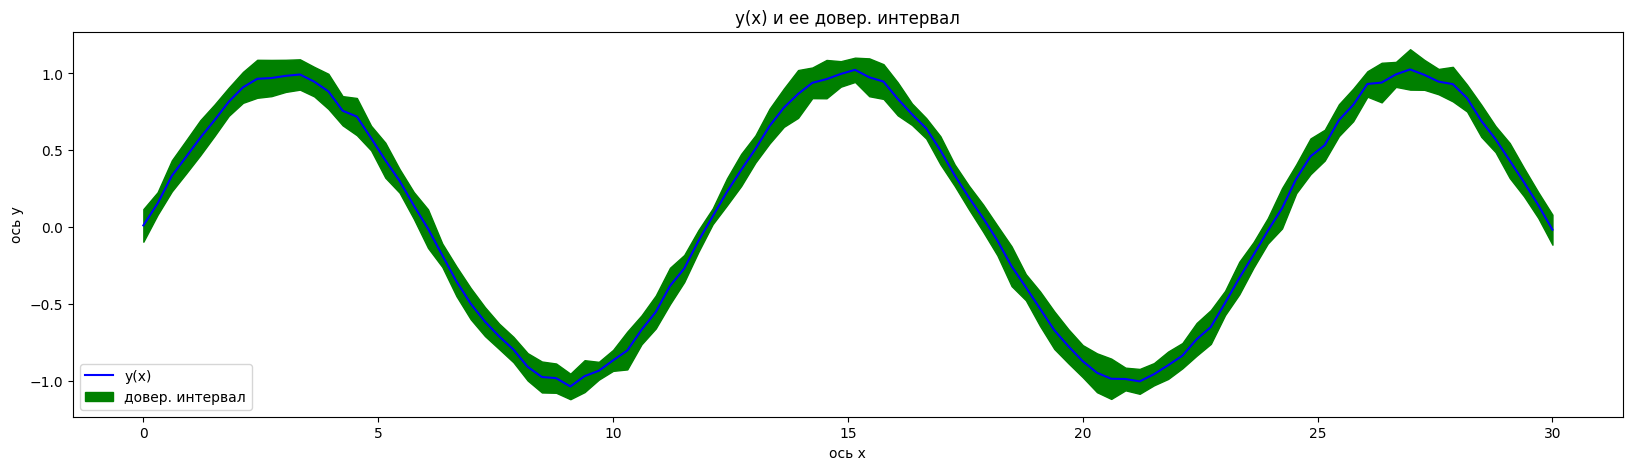

In [131]:
import matplotlib.pyplot as plt

def gen_uncertain_data():
        x = np.linspace(0, 30, 100)
        y = np.sin(x/6*np.pi) + np.random.normal(0, 0.02, size=x.shape)
        error = np.random.normal(0.1, 0.02, size=y.shape)
        return x, y, error


x, y, err = gen_uncertain_data()
plt.figure(figsize=(20, 5))
plt.plot(x, y, color='blue', label='y(x)')
plt.fill_between(x, y - err, y + err, color='green', label='довер. интервал')
plt.title('y(x) и ее довер. интервал')
plt.xlabel('ось x')
plt.ylabel('ось y')
plt.legend()
plt.show()

**2. (1 балл)** Отобразите гистограмму распределения возрастов для каждого класса пассажиров (здесь нужно использовать данные из заданий по pandas). В результате вы должны получить три гистограммы, которые необходимо отобразить рядом друг с другом используя функцию *plt.subplots*. Каждая гистограмма должна быть нормирована. Обратите внимание на параметры *figsize*, *sharey*, *sharex* функции *plt.subplots*. Также полезными могут оказаться параметры *bins*, *density* функции *plt.hist*.


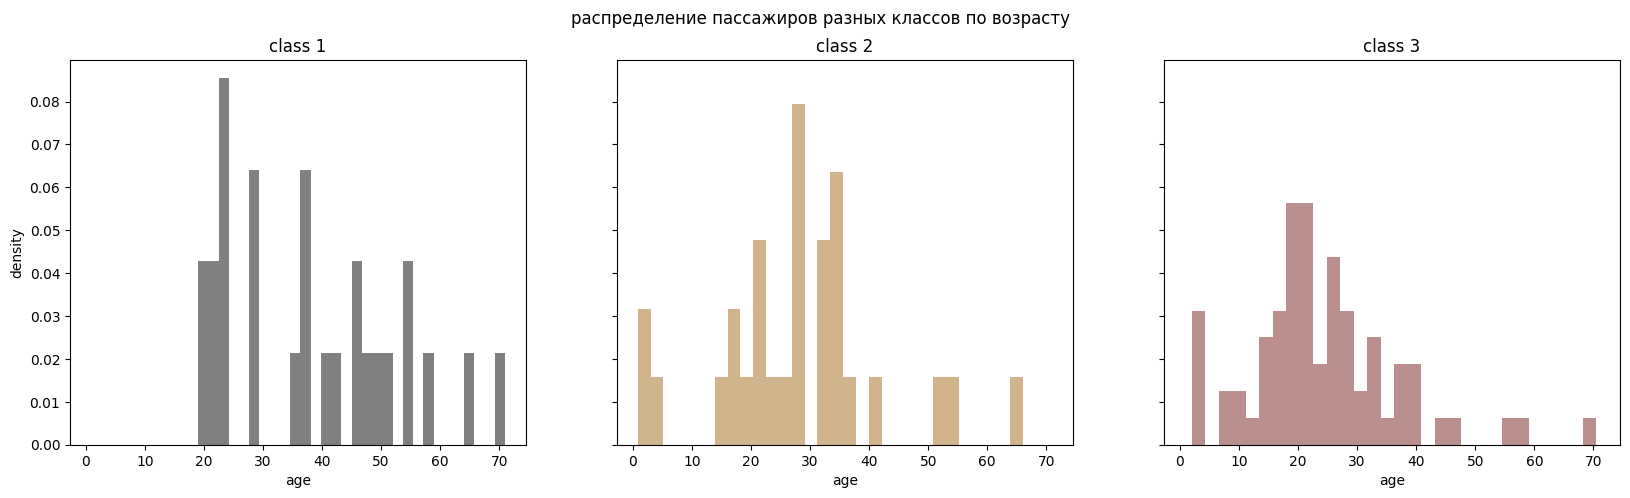

In [130]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5), sharey=True, sharex=True)

plt.suptitle('распределение пассажиров разных классов по возрасту')

axs[0].set_ylabel('density')


axs[0].hist(data[data['Pclass'] == 1]['Age'].dropna(), bins=30, density=True, color='grey')
axs[1].hist(data[data['Pclass'] == 2]['Age'].dropna(), bins=30, density=True, color='tan')
axs[2].hist(data[data['Pclass'] == 3]['Age'].dropna(), bins=30, density=True, color='rosybrown')

axs[0].set_title('class 1')
axs[1].set_title('class 2')
axs[2].set_title('class 3')

axs[0].set_xlabel('age')
axs[1].set_xlabel('age')
axs[2].set_xlabel('age')

plt.show()